# College Analysis
Full Data Documentation: https://collegescorecard.ed.gov/assets/FullDataDocumentation.pdf
Datasets Used: https://columbia.bootcampcontent.com/ecalzolaio/project_1/tree/master/datasets

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir('D:\\2019 Spring Baruch\\Columbia Engineering\\project_1')
os.getcwd()

'D:\\2019 Spring Baruch\\Columbia Engineering\\project_1'

In [17]:
%notebook "college-scorecard.ipynb"

## Explore and Process Data Documentation 
Our dataset contains 2100+ variables and these variables' names are encoded in abbreviations. Therefore, before we can start importing and cleaning our dataset, we need to perform some exploration and processing on our data documentation. The goal is to identify and extract only the information that are necessary for our purpose. We also package them into list and dictionaries to make it more convenient to use as we progress.
- Import the data dictionary to identify and extract the variable names needed
- Create a dictionary for selected variable names: 
  <br> ```essential_dict```: a dictionary for all the attributes about the colleges
  <br> ```major_dict```: a dictionary for all the undergraduate programs (majors) 

In [3]:
#Import data dictionary and examine the data structure
look_up = pd.read_excel('datasets/data-dictionary.xlsx', sheet_name = 'data_dictionary')
look_up = look_up[['NAME OF DATA ELEMENT', 'API data type', 'VARIABLE NAME']]
print(look_up.columns)
look_up.info()

Index(['NAME OF DATA ELEMENT', 'API data type', 'VARIABLE NAME'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 3 columns):
NAME OF DATA ELEMENT    1899 non-null object
API data type           1899 non-null object
VARIABLE NAME           1899 non-null object
dtypes: object(3)
memory usage: 50.4+ KB


In [4]:
#Extract the essential attributes of the colleges
var_df = pd.DataFrame()
data_element = []
var_name = []
keyword = ["Region","City","Enrollment of all undergraduate students","Bachelor's degree"]

for word in keyword:
    for i in range(0, len(look_up)):
        if word in str(look_up.iloc[i]['NAME OF DATA ELEMENT']):
            data_element.append(look_up.iloc[i]['NAME OF DATA ELEMENT'])
            var_name.append(look_up.iloc[i]['VARIABLE NAME'])
            
var_df['data-element'] = data_element
var_df['var-name'] = var_name

essential_var = var_df.iloc[0:4,:]
major_var = var_df.iloc[4:,:]

essential_var = essential_var[['var-name','data-element']]
essential_var

,var-name,data-element
0,REGION,Region (IPEDS)
1,CITY,City
2,UG,Enrollment of all undergraduate students
3,HIGHDEG,Highest degree awarded\n 0 Non-degree-granting...


In [5]:
#Extract the academic programs offered by colleges
major_split = major_var['data-element'].str.rsplit(" in ", n = 1, expand=True)
major_split = major_split[1].str.rsplit(".", n = 1, expand=True)
major_split = major_split.rename(columns={0:'major-name',1:'non'})
major_split = major_split.drop(columns='non')
major_var = major_var.drop(columns='data-element')
major_var['major-name'] = major_split
major_var.head()

,var-name,major-name
4,CIP01BACHL,"Agriculture, Agriculture Operations, And Relat..."
5,CIP03BACHL,Natural Resources And Conservation
6,CIP04BACHL,Architecture And Related Services
7,CIP05BACHL,"Area, Ethnic, Cultural, Gender, And Group Studies"
8,CIP09BACHL,"Communication, Journalism, And Related Programs"


In [6]:
#Create our essential dictionary and list
essential_dict = dict(zip(essential_var['var-name'], essential_var['data-element']))
essential_dict['REGION'] = 'Region'
essential_dict['UG'] = 'Enrollment'
essential_dict['HIGHDEG'] = 'Highest Degree Awarded'
essential_list = essential_var['var-name'].tolist()
essential_list

['REGION', 'CITY', 'UG', 'HIGHDEG']

In [7]:
#Create our major dictionary
major_dict = dict(zip(major_var['var-name'], major_var['major-name']))
major_list = major_var['var-name'].tolist()

## Import and Clean Raw Data

At this point, we will use the lists of variables we identified from data dictionary to extract the data needed from the raw dataset. Although the number of variables had been narrowed down from previous part, they are still 42 variables to deal with. Thus, to make it easier to create effective data visualization, we are about to summarize and group them appropriately in this stage.

- Import and extract only the columns about the essential city info and the degree programs offered in colleges
- Filter the data to get only information on schools in our top 20 targeted cities
- Group all the degree programs (majors) count by city
- Assign the 38 majors into their related fields (4 fields) 

In [8]:
all_data = pd.read_csv('datasets/college-scorecard.csv',low_memory=True)
major_data = all_data[essential_list + major_list]
major_dict.update(essential_dict)
major_data.rename(columns=major_dict, inplace=True)
major_data.head()

C:\Users\khanhdi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6,9,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1008,1009,1010,1011,1014,1015,1016,1017,1018,1019,1021,1022,1023,1027,1028,1029,1030,1031,1032,1034,1035,1036,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1065,1066,1067,1068,1069,1070,1071,1073,1074,1075,1076,1078,1079,1080,1081,1082,1083,1084,1086,1087,1088,1089,1091,1092,1093,1094,1095,1096,1097,1099,1100,1101,1102,1104,1105,1106,1107,1108,1109,1110,1112,1113,1114,1115,1118,1119,1121,1122,1123,1125,1127,1128,1131,1132,1134,1135,1136,1138,1140,1141,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1170,1171,1172,1173,1174,1175,1177,1178,1179,1180,1183,1184,1185,1186,1187,1188,1190,1192,1196,1199,1200,1201,1209,1212,1213,1214,1222,1223,1224,1225,1226,1227,1235,1236,12

,Region,City,Enrollment,Highest Degree Awarded,"Agriculture, Agriculture Operations, And Related Sciences",Natural Resources And Conservation,Architecture And Related Services,"Area, Ethnic, Cultural, Gender, And Group Studies","Communication, Journalism, And Related Programs",Communications Technologies/Technicians And Support Services,...,Public Administration And Social Service Professions,Social Sciences,Construction Trades,Mechanic And Repair Technologies/Technicians,Precision Production,Transportation And Materials Moving,Visual And Performing Arts,Health Professions And Related Programs,"Business, Management, Marketing, And Related Support Services",History
0,5,Normal,4380.0,4,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
1,5,Birmingham,10331.0,4,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0
2,5,Montgomery,98.0,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,5,Huntsville,5220.0,4,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0
4,5,Montgomery,4348.0,4,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [9]:
#Obtain the list of cities to focus on
top20_dict = [{'Atlanta': 'GA', 'Austin' :'TX', 'Boston': 'MA', 
               'Chicago': 'IL', 'Columbus': 'OH', 'Dallas': 'TX', 
               'Denver': 'CO', 'Indianapolis': 'IN', 'Los Angeles': 'CA',
               'Miami': 'FL', 'Montgomery County': 'MD', 'Nashville': 'TN', 
               'Newark': 'NJ', 'New York': 'NY', 'Northern Virginia': 'VA', 
               'Philadelphia': 'PA', 'Pittsburgh': 'PA', 'Raleigh': 'NC', 
               'Toronto': 'Ontario', 'Washington': 'D.C.'}]

#Montgomery County was changed to Montgonery
#Northern Virginia was changed to Washington DC, Fairfax,...
top20_list = ['Atlanta', 'Austin', 'Boston', 'Chicago', 'Columbus', 
              'Dallas', 'Denver', 'Indianapolis', 'Los Angeles', 
              'Miami', 'Montgomery', 'Nashville', 'Newark', 
              'New York', 'Northern Virginia', 'Philadelphia', 
              'Pittsburgh', 'Raleigh', 'Toronto', 'Washington']


#Filter only the cities we need 
major_cities = major_data.loc[major_data['City'].isin(top20_list)]
major_cities.head()

,Region,City,Enrollment,Highest Degree Awarded,"Agriculture, Agriculture Operations, And Related Sciences",Natural Resources And Conservation,Architecture And Related Services,"Area, Ethnic, Cultural, Gender, And Group Studies","Communication, Journalism, And Related Programs",Communications Technologies/Technicians And Support Services,...,Public Administration And Social Service Professions,Social Sciences,Construction Trades,Mechanic And Repair Technologies/Technicians,Precision Production,Transportation And Materials Moving,Visual And Performing Arts,Health Professions And Related Programs,"Business, Management, Marketing, And Related Support Services",History
2,5,Montgomery,98.0,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,5,Montgomery,4348.0,4,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,5,Montgomery,4098.0,4,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0
13,5,Montgomery,207.0,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
16,5,Montgomery,612.0,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0


In [10]:
major_cities['City'].unique()

array(['Montgomery', 'Los Angeles', 'Denver', 'New York', 'Newark',
       'Washington', 'Miami', 'Atlanta', 'Columbus', 'Chicago',
       'Indianapolis', 'Boston', 'Austin', 'Dallas', 'Raleigh',
       'Philadelphia', 'Pittsburgh', 'Nashville'], dtype=object)

In [11]:
#Obtain list of regions from data.gov
region_list = ['U.S. Service Schools','New England (CT, ME, MA, NH, RI, VT)',
               'Mid East (DE, DC, MD, NJ, NY, PA)','Great Lakes (IL, IN, MI, OH, WI)',
               'Plains (IA, KS, MN, MO, NE, ND, SD)','Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)',
               'Southwest (AZ, NM, OK, TX)','Rocky Mountains (CO, ID, MT, UT, WY)',
               'Far West (AK, CA, HI, NV, OR, WA)','Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)']
region_dict = {}
for i in range(0, len(region_list)):
    region_dict[i] = region_list[i]
region_dict

{0: 'U.S. Service Schools',
 1: 'New England (CT, ME, MA, NH, RI, VT)',
 2: 'Mid East (DE, DC, MD, NJ, NY, PA)',
 3: 'Great Lakes (IL, IN, MI, OH, WI)',
 4: 'Plains (IA, KS, MN, MO, NE, ND, SD)',
 5: 'Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)',
 6: 'Southwest (AZ, NM, OK, TX)',
 7: 'Rocky Mountains (CO, ID, MT, UT, WY)',
 8: 'Far West (AK, CA, HI, NV, OR, WA)',
 9: 'Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)'}

In [12]:
count_major = major_cities.groupby('City')[major_var['major-name']].sum()
count_major

,"Agriculture, Agriculture Operations, And Related Sciences",Natural Resources And Conservation,Architecture And Related Services,"Area, Ethnic, Cultural, Gender, And Group Studies","Communication, Journalism, And Related Programs",Communications Technologies/Technicians And Support Services,Computer And Information Sciences And Support Services,Personal And Culinary Services,Education,Engineering,...,Public Administration And Social Service Professions,Social Sciences,Construction Trades,Mechanic And Repair Technologies/Technicians,Precision Production,Transportation And Materials Moving,Visual And Performing Arts,Health Professions And Related Programs,"Business, Management, Marketing, And Related Support Services",History
City,,,,,,,,,,,,,,,,,,,,,
Atlanta,0.0,2.0,1.0,5.0,4.0,2.0,13.0,1.0,8.0,5.0,...,4.0,9.0,0.0,0.0,0.0,0.0,11.0,6.0,15.0,7.0
Austin,0.0,3.0,1.0,2.0,4.0,1.0,12.0,1.0,3.0,1.0,...,2.0,6.0,0.0,0.0,0.0,0.0,5.0,9.0,12.0,4.0
Boston,1.0,7.0,5.0,7.0,12.0,3.0,11.0,0.0,10.0,5.0,...,11.0,9.0,0.0,1.0,0.0,0.0,16.0,21.0,18.0,8.0
Chicago,0.0,5.0,4.0,9.0,17.0,4.0,21.0,2.0,14.0,3.0,...,8.0,13.0,0.0,1.0,0.0,0.0,19.0,17.0,26.0,9.0
Columbus,1.0,3.0,1.0,2.0,9.0,1.0,9.0,1.0,5.0,4.0,...,7.0,8.0,0.0,0.0,0.0,1.0,8.0,12.0,13.0,5.0
Dallas,0.0,2.0,0.0,1.0,5.0,1.0,9.0,1.0,6.0,1.0,...,3.0,7.0,0.0,0.0,0.0,0.0,4.0,12.0,14.0,5.0
Denver,0.0,4.0,1.0,4.0,7.0,1.0,8.0,2.0,7.0,2.0,...,7.0,7.0,0.0,0.0,0.0,1.0,6.0,12.0,16.0,4.0
Indianapolis,0.0,6.0,0.0,2.0,6.0,1.0,12.0,1.0,9.0,2.0,...,4.0,5.0,0.0,0.0,0.0,0.0,5.0,16.0,18.0,4.0
Los Angeles,1.0,4.0,4.0,6.0,4.0,3.0,7.0,0.0,3.0,4.0,...,3.0,8.0,0.0,0.0,0.0,0.0,11.0,8.0,13.0,6.0


In [13]:
fields = {'STEM Degree':['Computer And Information Sciences And Support Services',
                         'Engineering Technologies And Engineering-Related Fields',
                         'Engineering','Mathematics And Statistics',
                         'Physical Sciences', 'Science Technologies/Technicians',
                         'Military Technologies And Applied Sciences',
                         'Natural Resources And Conservation',
                         'Mechanic And Repair Technologies/Technicians', 
                         'Precision Production','Physical Sciences', 
                         'Science Technologies/Technicians',
                         'Biological And Biomedical Sciences',
                         'Health Professions And Related Programs',
                         'Architecture And Related Services'],
          'Humanities and Social Sciences':['Area, Ethnic, Cultural, Gender, And Group Studies',
                                            'Foreign Languages, Literatures, And Linguistics',
                                            'Multi/Interdisciplinary Studies','Social Sciences',
                                            'Philosophy And Religious Studies', 'Psychology',
                                            'Theology And Religious Vocations', 'History',
                                            'English Language And Literature/Letters',
                                            'Liberal Arts And Sciences, General Studies And Humanities',
                                            'Library Science', 'Education', 'Visual And Performing Arts'],
          'Public Affairs':['Parks, Recreation, Leisure, And Fitness Studies',
                            'Homeland Security, Law Enforcement, Firefighting And Related Protective Services',
                            'Public Administration And Social Service Professions',
                            'Construction Trades', 'Transportation And Materials Moving'],
          'Business and Communication':['Agriculture, Agriculture Operations, And Related Sciences',
                                        'Communication, Journalism, And Related Programs',
                                        'Communications Technologies/Technicians And Support Services',
                                        'Personal And Culinary Services',  
                                        'Family And Consumer Sciences/Human Sciences',
                                        'Legal Professions And Studies',
                                        'Business, Management, Marketing, And Related Support Services']} 

In [14]:
aggregated_major = pd.DataFrame()
for key in fields:
    aggregated_major[f'Number of {key}'] = count_major[fields[key]].agg("sum", axis = "columns")
aggregated_major

,Number of STEM Degree,Number of Humanities and Social Sciences,Number of Public Affairs,Number of Business and Communication
City,,,,
Atlanta,57.0,82.0,15.0,24.0
Austin,41.0,41.0,14.0,19.0
Boston,84.0,102.0,23.0,38.0
Chicago,103.0,146.0,26.0,53.0
Columbus,52.0,62.0,17.0,28.0
Dallas,40.0,58.0,11.0,22.0
Denver,47.0,61.0,19.0,29.0
Indianapolis,56.0,62.0,19.0,29.0
Los Angeles,53.0,82.0,8.0,26.0


## Visualize the Data 

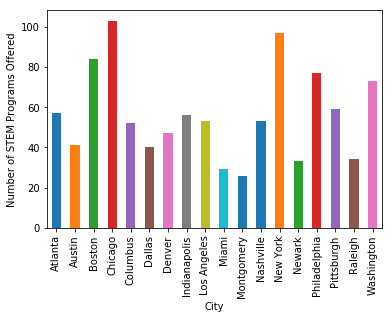

In [15]:
chart_major = aggregated_major['Number of STEM Degree'].plot(kind='bar')
chart_major.set_xlabel('City')
chart_major.set_ylabel('Number of STEM Programs Offered')
plt.show()

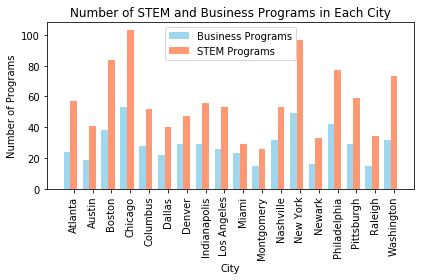

In [16]:
# data to plot
n_groups = 18
bar_biz = aggregated_major['Number of Business and Communication']
bar_stem = aggregated_major['Number of STEM Degree']
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, bar_biz, bar_width,
alpha=opacity,
color='skyblue',
label='Business Programs')
 
rects2 = plt.bar(index + bar_width, bar_stem, bar_width,
alpha=opacity,
color='coral',
label='STEM Programs')
 
plt.xlabel('City')
plt.ylabel('Number of Programs')
plt.title('Number of STEM and Business Programs in Each City')
plt.xticks(index + bar_width, (aggregated_major.index), rotation='vertical')
plt.legend()
 
plt.tight_layout()
plt.show()

In [17]:
%notebook "college-scorecard.ipynb"